In [1]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.3 MB/s 
     |████████████████████████████████| 163 kB 56.8 MB/s 
     |████████████████████████████████| 7.6 MB 44.5 MB/s 


In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [3]:
from PIL import Image
from IPython.display import display


In [6]:
model = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:

def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img



In [38]:
def ocr_printed_image(src_img):
  pixel_values = model(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return model.batch_decode(generated_ids, skip_special_tokens=True)[0]

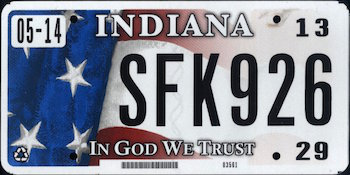

In [76]:
invoice_image = show_image('/content/drive/MyDrive/DL/indiana-license.jpg')

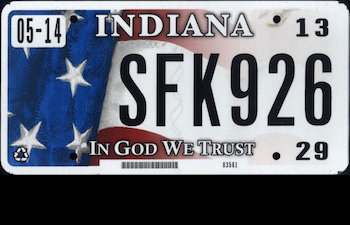

In [79]:
invoice_image1 = invoice_image.crop((0, 0, invoice_image.size[0], 225))
display(invoice_image1)

In [80]:
ocr_printed_image(invoice_image1)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'* SFK926'